## 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import csv
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

## 작품 선택하기

In [334]:
# csv 파일들
# /Movie/Ben Platt Live From Radio City Music Hall/Ben.Platt.Live.from.Radio.City.Music.Hall.WEBRip.Netflix.en[cc].csv
# /Movie/Inception/Inception.WEBRip.Netflix.en[cc].csv
# /Movie/Klaus/Klaus.WEBRip.Netflix.en[cc].csv
# /Movie/Monty Python And The Holy Grail/Monty.Python.and.the.Holy.Grail.WEBRip.Netflix.en[cc].csv
# /Movie/The Boy In The Striped Pajamas/The.Boy.in.the.Striped.Pajamas.WEBRip.Netflix.en[cc].csv
# /Movie/The Departed/The.Departed.WEBRip.Netflix.en[cc].csv
# /Movie/There Will Be Blood/There.Will.Be.Blood.WEBRip.Netflix.en[cc].csv

In [2]:
#Drama
Drama = ['Breaking Bad', 'Friends', 'Game of Thrones', 'Greys Anatomy', 'Modern Family', 'Sherlock', 'The Big Bang Theory', 'The Good Place']
Movie = ['Ben Platt Live From Radio City Music Hall', 'Inception', 'Klaus', 'Men In Black', 'Moneyball', 'Monty Python And The Holy Grail', 'The Boy In The Striped Pajamas', 'The Departed', 'The Intern', 'There Will Be Blood', 'Zootopia']

## 여기서 작품 선택합니다 꼭!!

In [6]:
title = Movie[0] # 여기서 작품 선택

# 파일명 확정되면 수정
if title in Drama:
    path = '../Script/Drama'
    file_name = title.replace(' ', '.') + '.WEBRip.Netflix.en[cc]'
    # file_name = 'Ben.Platt.Live.from.Radio.City.Music.Hall.WEBRip.Netflix.en[cc]'
else:
    path = '../Script/Movie'
    file_name = title.replace(' ', '.') + '.WEBRip.Netflix.en[cc]'
    # file_name = 'There.Will.Be.Blood.WEBRip.Netflix.en[cc]'

## CSV 파일 읽기

In [7]:
data = pd.read_csv(f'{path}/{title}/{file_name}.csv')

In [8]:
script = data

## 데이터 정보

In [9]:
script.info()
script.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   num     399 non-null    int64 
 1   start   399 non-null    object
 2   end     399 non-null    object
 3   script  399 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


,num,start,end,script
0,6,00:00:28.153,00:00:29.529,"['And', 'relax.']"
1,7,00:00:31.656,00:00:32.824,"['This', 'is', 'perfect', 'here.']"
2,8,00:00:33.199,00:00:35.160,"['Yes,', 'and', 'we', 'have', 'one', 'exercise..."
3,68,00:05:18.151,00:05:20.403,"['Hello,', 'Radio', 'City!']"
4,69,00:05:23.281,00:05:24.907,"['Thank', 'you', 'so', 'much', 'for', 'being',..."
5,70,00:05:26.034,00:05:28.202,"['If', 'you', 'happen', 'to', 'know', 'it,', '..."
6,127,00:08:52.323,00:08:54.325,"['Well', 'hello,', 'New', 'York', 'City,', 'ho..."
7,128,00:08:57.578,00:09:00.706,"['I', 'feel', 'very', 'overwhelmed', 'because'..."
8,129,00:09:03.000,00:09:05.503,"['Yes,', ""you've"", 'heard', 'as', 'well,', 'I'..."
9,130,00:09:05.586,00:09:07.672,"['Um,', 'and', 'this', 'is', 'very', 'crazy.']"


## DataFrame to Text

In [10]:
list_script = []
list_script.extend(data for data in script['script'])
# len(list_script)
# list_script[:10]
text_script = ' '.join(list_script)
text_script[:500]

'[\'And\', \'relax.\'] [\'This\', \'is\', \'perfect\', \'here.\'] [\'Yes,\', \'and\', \'we\', \'have\', \'one\', \'exercise\', \'to\', \'do.\'] [\'Hello,\', \'Radio\', \'City!\'] [\'Thank\', \'you\', \'so\', \'much\', \'for\', \'being\', \'here!\'] [\'If\', \'you\', \'happen\', \'to\', \'know\', \'it,\', \'feel\', \'free\', \'to\', \'sing.\'] [\'Well\', \'hello,\', \'New\', \'York\', \'City,\', \'how\', \'are\', \'you?\'] [\'I\', \'feel\', \'very\', \'overwhelmed\', \'because\', \'this\', \'is\', \'Radio\', \'City\', \'Music\', \'Hall.\'] [\'Yes,\', "you\'ve", \'heard\', \'as\', \'well,\', \'I\', \'see.\'] [\'Um,\''

## 영문자 이외 문자는 공백으로 변환

In [12]:
import re

# 영문자 이외 문자는 공백으로 변환
only_english_script = re.sub('[^a-zA-Z]', ' ', text_script)
only_english_script[:500]

'  And    relax      This    is    perfect    here      Yes     and    we    have    one    exercise    to    do      Hello     Radio    City      Thank    you    so    much    for    being    here      If    you    happen    to    know    it     feel    free    to    sing      Well    hello     New    York    City     how    are    you      I    feel    very    overwhelmed    because    this    is    Radio    City    Music    Hall      Yes     you ve    heard    as    well     I    see      Um  '

## 소문자로 변환

In [14]:
# 소문자 변환
no_capitals_script = only_english_script.lower().split()
print(len(no_capitals_script), '\n', no_capitals_script[:50])

3428 
 ['and', 'relax', 'this', 'is', 'perfect', 'here', 'yes', 'and', 'we', 'have', 'one', 'exercise', 'to', 'do', 'hello', 'radio', 'city', 'thank', 'you', 'so', 'much', 'for', 'being', 'here', 'if', 'you', 'happen', 'to', 'know', 'it', 'feel', 'free', 'to', 'sing', 'well', 'hello', 'new', 'york', 'city', 'how', 'are', 'you', 'i', 'feel', 'very', 'overwhelmed', 'because', 'this', 'is', 'radio']


# nltk 설치!! 만약에 설치되어 있으면 주석 처리하기!!

In [343]:
# 설치 되었으면 주석 처리하기
# !pip3 install nltk

In [15]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NSK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 불용어 제거

In [17]:
 # 불용어 제거
stops = set(stopwords.words('english'))
no_stops_script = [word for word in no_capitals_script if not word in stops]
len(no_stops_script)

1379

list -> DataFrame

In [18]:
df_script = pd.DataFrame(no_stops_script)
result_script = pd.DataFrame(df_script.value_counts())
result_script = result_script.rename_axis('words').rename(columns={0: 'counts'})
result_script

,counts
words,
like,33
one,24
song,23
know,17
really,15
...,...
happened,1
hannah,1
handed,1


## 파일로 저장

In [19]:
result_script.to_csv(f'{path}/{title}/unique_words_{file_name}.csv', sep=',')

## 저장한 파일 확인

In [21]:
data_check = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
data_check

,words,counts
0,like,33
1,one,24
2,song,23
3,know,17
4,really,15
...,...,...
642,happened,1
643,hannah,1
644,handed,1
645,halloween,1


## 정제된 대본 데이터 불러오기

In [22]:
new_data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
script_data = new_data
script_data.info()
display(script_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   647 non-null    object
 1   counts  647 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


,words,counts
0,like,33
1,one,24
2,song,23
3,know,17
4,really,15
...,...,...
642,happened,1
643,hannah,1
644,handed,1
645,halloween,1


## 기준 단어 데이터 불러오기

In [23]:
path = '../'
words = pd.read_csv(f'{path}/words/word - AllLevels.csv')
words

,word,level
0,1.0,TRUE
1,1.0,zero
2,1.0,young
3,1.0,you
4,1.0,yet
...,...,...
24836,NaN,vaunted
24837,NaN,vehemence
24838,NaN,victimizer
24839,NaN,washout


## 단어 데이터에서 레벨이 없는 단어들은 999로 처리

In [24]:
words['word'] = words['word'].fillna(999).astype('int64')
words = words.rename(columns={'word':'level', 'level':'words'})
words

,level,words
0,1,TRUE
1,1,zero
2,1,young
3,1,you
4,1,yet
...,...,...
24836,999,vaunted
24837,999,vehemence
24838,999,victimizer
24839,999,washout


## 대본과 매칭되는 단어가 있다면 레벨 입력하고, 대본과 매칭되는 단어가 없다면 0 입력

In [25]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   647 non-null    object 
 1   counts  647 non-null    int64  
 2   level   446 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.2+ KB


,words,counts,level
0,like,33,1
1,one,24,1
2,song,23,1
3,know,17,1
4,really,15,1
...,...,...,...
642,happened,1,0
643,hannah,1,0
644,handed,1,0
645,halloween,1,999


## result 데이터 프레임 생성

In [26]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,249
0,201
999,115
2,49
3,14
5,14
4,5


In [27]:
result['rate'] = [i / len(script_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,0,201,31.066461
1,1,249,38.485317
2,2,49,7.573416
3,3,14,2.163833
4,4,5,0.772798
5,5,14,2.163833
6,999,115,17.774343


<AxesSubplot:xlabel='level'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


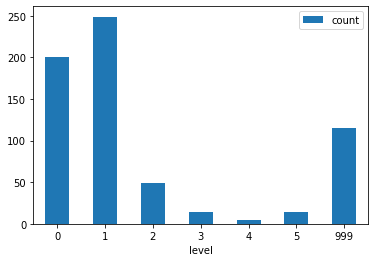

In [28]:
result.plot(x='level', y='count', kind='bar', rot=0)

## 단어 데이터에 있다면 True, 없다면 False인 matched 컬럼

In [29]:
matched_data['matched'] = [True if i in [1, 2, 3, 4, 5, 999] else False for i in matched_data['level']]

In [30]:
matched_data

,words,counts,level,matched
0,like,33,1,True
1,one,24,1,True
2,song,23,1,True
3,know,17,1,True
4,really,15,1,True
...,...,...,...,...
642,happened,1,0,False
643,hannah,1,0,False
644,handed,1,0,False
645,halloween,1,999,True


In [31]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data = matched_data[matched_data['level'] != 0]
matched_data = matched_data[matched_data['level'] != 999]
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   647 non-null    object 
 1   counts  647 non-null    int64  
 2   level   446 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.2+ KB


,words,counts,level
0,like,33,1
1,one,24,1
2,song,23,1
3,know,17,1
4,really,15,1
...,...,...,...
627,honest,1,1
629,hinge,1,5
630,high,1,1
640,hard,1,1


In [32]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,249
2,49
3,14
5,14
4,5


In [33]:
result['rate'] = [i / len(matched_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,1,249,75.226586
1,2,49,14.803625
2,3,14,4.229607
3,4,5,1.510574
4,5,14,4.229607


<AxesSubplot:xlabel='level'>

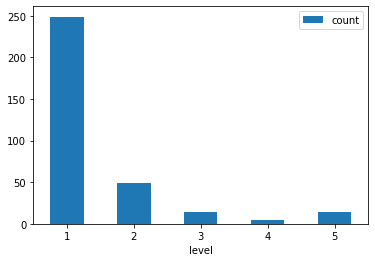

In [34]:

result.plot(x='level', y='count', kind='bar', rot=0)